## Creating a composite image from multiple PlanetScope scenes


**Note**: PSScene3Band and PSScene4Band item type and assets used in this tutorial will be deprecated by January 2023. These item types will not be available for new customers provisioned after March 1, 2022. We recommend all customers who are interested in medium resolution imagery use the [PSScene item type](http://www.gdal.org/) as soon as possible.

**More information about this change can be found [here](https://developers.planet.com/docs/apis/data/psscene3-4band-deprecation/)**

In this guide, you'll learn how to create a composite image (or mosaic) from multiple PlanetScope scenes that cover an area of interest (AOI). You'll need [GDAL (Geospatial Data Abstraction Library)](https://developers.planet.com/docs/data/psscene/) and its python bindings installed to run the commands below. 

First, let's use [Planet Explorer](https://www.planet.com/explorer/) to travel to stunning Yosemite National Park. You can see below that I've drawn an area of interest (AOI) around [Mount Dana](https://en.wikipedia.org/wiki/Mount_Dana) on the eastern border of Yosemite. You can use [this geojson file](data/mt-dana-small.geojson) to search for this same AOI.


I want an image that depicts the mountain on a clear summer day, so I've narrowed my data search in Planet Explorer to scenes with less than 5% cloud cover, captured in July and August 2016. 

![Mount Dana in Planet Explorer](images/pe-mtdana.gif)

As you can see in the animated gif above, my search yielded a set of three PlanetScope scenes, all taken on August 20, 2016. Together these scenes cover 100% of my area of interest. As I roll over each item in Planet Explorer, I can see that the scenes' rectangular footprints extend far beyond Mount Dana. All three scenes overlap slightly, and one scene touches only a small section at the bottom of my AOI. Still, they look good to me, so I'm going to submit an order for the visual assets. 

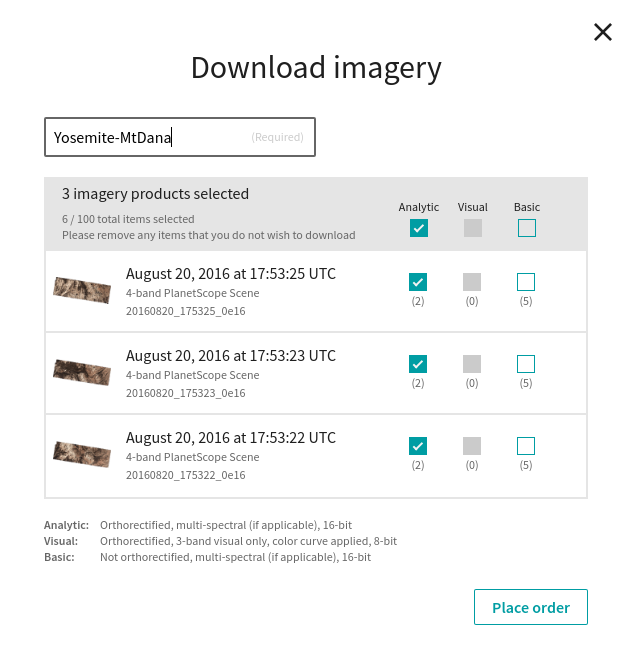

After downloading, moving, and wrangling the data, I'm ready to create a composite image from the three scenes. First, though, I'll use `gdalinfo` to inspect the spatial metadata of the scenes. 

In [1]:
!gdalinfo data/175322.tif 
!gdalinfo data/175323.tif
!gdalinfo data/175325.tif

ERROR 4: data/175322.tif: No such file or directory
gdalinfo failed - unable to open 'data/175322.tif'.
ERROR 4: data/175323.tif: No such file or directory
gdalinfo failed - unable to open 'data/175323.tif'.
ERROR 4: data/175325.tif: No such file or directory
gdalinfo failed - unable to open 'data/175325.tif'.


The three scenes have the same coordinate systems and the same number of bands, so we can go ahead and use the `gdal_merge.py` utility to stitch them together. In areas of overlap, the utility will copy over parts of the previous image in the list of input files with data from the next image. The `-v` flag in the command below allows us to see the output of the mosaicing operations as they are done. 

In [2]:
!gdal_merge.py -v data/175322.tif data/175323.tif data/175325.tif -o output/mtdana-merged.tif

ERROR 4: data/175322.tif: No such file or directory
ERROR 4: data/175323.tif: No such file or directory
ERROR 4: data/175325.tif: No such file or directory
Traceback (most recent call last):
  File "/opt/conda/bin/gdal_merge.py", line 4, in <module>
    __import__('pkg_resources').run_script('GDAL==3.0.4', 'gdal_merge.py')
  File "/opt/conda/lib/python3.7/site-packages/pkg_resources/__init__.py", line 667, in run_script
    self.require(requires)[0].run_script(script_name, ns)
  File "/opt/conda/lib/python3.7/site-packages/pkg_resources/__init__.py", line 1463, in run_script
    exec(code, namespace, namespace)
  File "/opt/conda/lib/python3.7/site-packages/GDAL-3.0.4-py3.7-linux-x86_64.egg-info/scripts/gdal_merge.py", line 611, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.7/site-packages/GDAL-3.0.4-py3.7-linux-x86_64.egg-info/scripts/gdal_merge.py", line 494, in main
    ulx = file_infos[0].ulx
IndexError: list index out of range


We can see in the verbose output above that the mosaicing operation is fairly simple: the utility script is basically copying a range of pixels for each band in each scene over to the designated output file. We can use `gdalinfo` to inspect the metadata of the merged raster file we created.

In [3]:
!gdalinfo output/mtdana-merged.tif

ERROR 4: output/mtdana-merged.tif: No such file or directory
gdalinfo failed - unable to open 'output/mtdana-merged.tif'.


The merged raster is a large GeoTiff file, so we're going use `gdal_translate`, another GDAL utility, to convert it to a PNG and set the output image to a percentage of the original. That will make it easier for us to view in this notebook. 

In [4]:
!gdal_translate -of "PNG" -outsize 10% 0% output/mtdana-merged.tif output/mtdana-merged.png

ERROR 4: output/mtdana-merged.tif: No such file or directory


Now let's view the merged image.

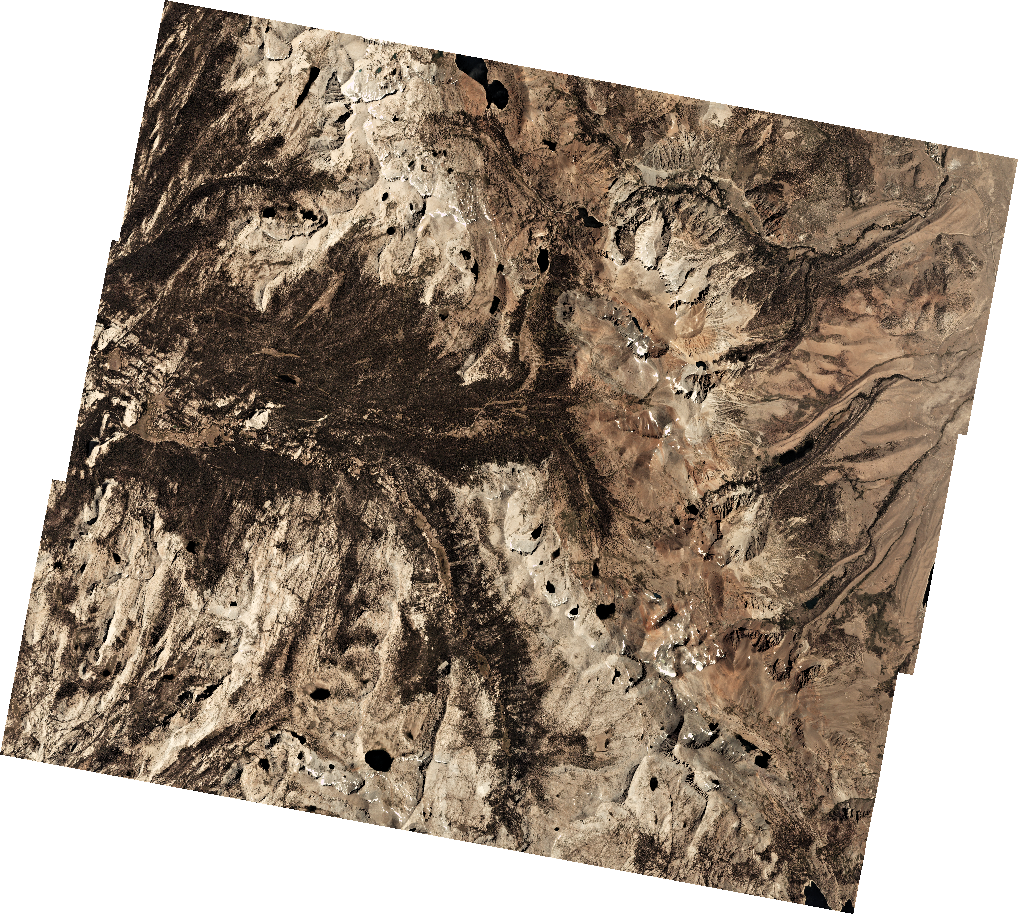

In [5]:
from IPython.display import Image
Image(filename="output/mtdana-merged.png")

Success! Wait... this is definitely a composite image from our three PlanetScope scenes, but it's not really what we want. We'd much rather have a composite image that is cropped to the boundaries of our AOI. We can use `gdalwarp` to clip the raster to our area of interest (defined by a `geojson` file). 

In [6]:
!gdalwarp -of GTiff -cutline data/mt-dana-small.geojson -crop_to_cutline output/mtdana-merged.tif output/mtdana-cropped.tif

ERROR 4: output/mtdana-merged.tif: No such file or directory


Again, we'll use `gdal_translate` to convert the GeoTiff to a smaller PNG so that it's easier to view the cropped image.

In [7]:
!gdal_translate -of "PNG" -outsize 10% 0% output/mtdana-cropped.tif output/mtdana-cropped.png

ERROR 4: output/mtdana-cropped.tif: No such file or directory


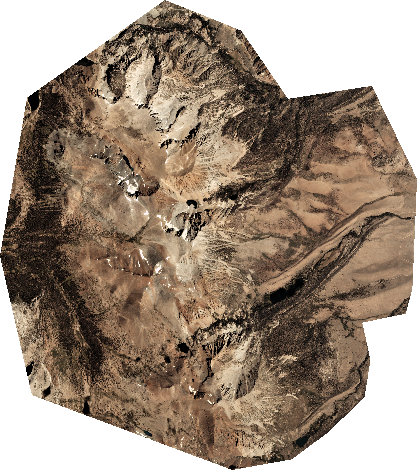

In [8]:
from IPython.display import Image
Image(filename="output/mtdana-cropped.png")

Success! A cropped, composite image of Mount Dana in Yosemite! [Who wants to go for a hike?](https://www.alltrails.com/trail/us/california/mount-dana-summit-trail)